<a href="https://colab.research.google.com/github/soodeh-nilforoushan/Loan-Data-Analysis/blob/main/Loan_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [46]:
!unzip loan_data.zip


unzip:  cannot find or open loan_data.zip, loan_data.zip.zip or loan_data.zip.ZIP.


In [47]:
data=pd.read_csv("loan_data.csv")

In [48]:
data.shape

(9578, 14)

In [49]:
X=data.iloc[:, :13]

In [50]:
X

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0


In [51]:
y=data.iloc[:,-1]

In [10]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

In [52]:
data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [53]:
t1=data["not.fully.paid"].value_counts()

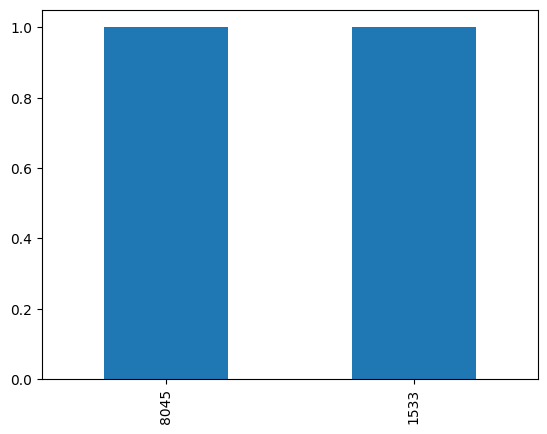

In [54]:
t1.value_counts().plot(kind = "bar")
plt.show()

In [55]:
# Balance the dataset using under-fitting random sampling, decrease the number of instances in the majority class(es).
shuffled_df = data.sample(frac=1,random_state=42)
debt = shuffled_df[shuffled_df["not.fully.paid"]==1]
non_debt = shuffled_df[shuffled_df["not.fully.paid"]==0].sample(n=1533,random_state=42)
balanced_df = pd.concat([debt,non_debt])

In [56]:
balanced_df.shape

(3066, 14)

In [57]:
balanced_df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1383,1,credit_card,0.1146,197.75,10.348173,13.73,692,2069.958333,14154,85.8,0,0,0,1
6310,1,major_purchase,0.1461,310.28,10.308953,15.44,677,3690.000000,3971,58.4,0,0,0,1
2603,1,debt_consolidation,0.1442,412.60,10.518673,7.91,682,4049.958333,8748,85.8,1,0,0,1
2423,1,all_other,0.1663,638.46,10.807706,10.91,667,2040.041667,6241,21.0,3,0,0,1
6017,1,debt_consolidation,0.1114,367.40,10.463103,10.80,732,3810.041667,10631,36.9,3,0,0,1
5391,1,debt_consolidation,0.1426,626.08,10.858999,23.12,687,3627.000000,13882,69.4,0,0,0,1
5712,1,credit_card,0.1600,562.52,10.778956,20.60,662,4110.041667,10441,50.7,2,2,0,1
5521,1,all_other,0.1426,41.17,8.476371,13.75,702,2580.000000,0,36.5,0,0,0,1
5165,1,debt_consolidation,0.0894,285.95,10.648753,11.33,737,3450.000000,13421,67.4,0,0,0,1
4306,1,debt_consolidation,0.1148,337.93,11.289782,11.13,752,3600.000000,7268,24.9,1,0,0,1


In [17]:
t3=balanced_df["not.fully.paid"].value_counts()
t3

1    1533
0    1533
Name: not.fully.paid, dtype: int64

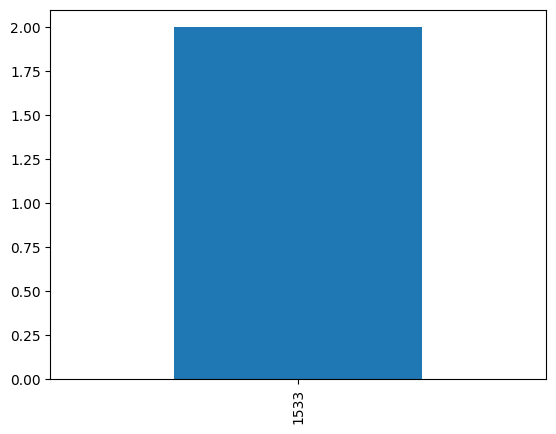

In [18]:
t3.value_counts().plot(kind="bar")
plt.show()

In [58]:
categorical_variable=balanced_df["purpose" ]

In [59]:
import pandas as pd

# Use pandas get_dummies function
dummy_encoded_values = pd.get_dummies(categorical_variable, drop_first=True)

In [60]:
dummy_encoded_values.head(5)

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
1383,1,0,0,0,0,0
6310,0,0,0,0,1,0
2603,0,1,0,0,0,0
2423,0,0,0,0,0,0
6017,0,1,0,0,0,0


In [22]:
# Concatenate the original DataFrame and the dummy encoded DataFrame
df_encoded = pd.concat([balanced_df, dummy_encoded_values], axis=1)

In [42]:
df_encoded.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
1383,1,credit_card,0.1146,197.75,10.348173,13.73,692,2069.958333,14154,85.8,0,0,0,1,1,0,0,0,0,0
6310,1,major_purchase,0.1461,310.28,10.308953,15.44,677,3690.000000,3971,58.4,0,0,0,1,0,0,0,0,1,0
2603,1,debt_consolidation,0.1442,412.60,10.518673,7.91,682,4049.958333,8748,85.8,1,0,0,1,0,1,0,0,0,0
2423,1,all_other,0.1663,638.46,10.807706,10.91,667,2040.041667,6241,21.0,3,0,0,1,0,0,0,0,0,0
6017,1,debt_consolidation,0.1114,367.40,10.463103,10.80,732,3810.041667,10631,36.9,3,0,0,1,0,1,0,0,0,0


In [26]:
balanced_df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1383,1,credit_card,0.1146,197.75,10.348173,13.73,692,2069.958333,14154,85.8,0,0,0,1
6310,1,major_purchase,0.1461,310.28,10.308953,15.44,677,3690.000000,3971,58.4,0,0,0,1
2603,1,debt_consolidation,0.1442,412.60,10.518673,7.91,682,4049.958333,8748,85.8,1,0,0,1
2423,1,all_other,0.1663,638.46,10.807706,10.91,667,2040.041667,6241,21.0,3,0,0,1
6017,1,debt_consolidation,0.1114,367.40,10.463103,10.80,732,3810.041667,10631,36.9,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8586,0,all_other,0.1261,73.72,10.596635,10.53,667,3570.000000,4832,25.0,5,1,0,0
784,1,credit_card,0.1166,314.00,11.695247,18.23,697,4950.000000,114629,64.5,2,0,0,0
6004,1,debt_consolidation,0.0859,316.11,10.959610,8.31,757,8430.041667,20627,21.9,0,0,0,0
5645,1,all_other,0.1114,590.47,11.630709,0.99,772,4574.041667,0,0.0,0,0,0,0


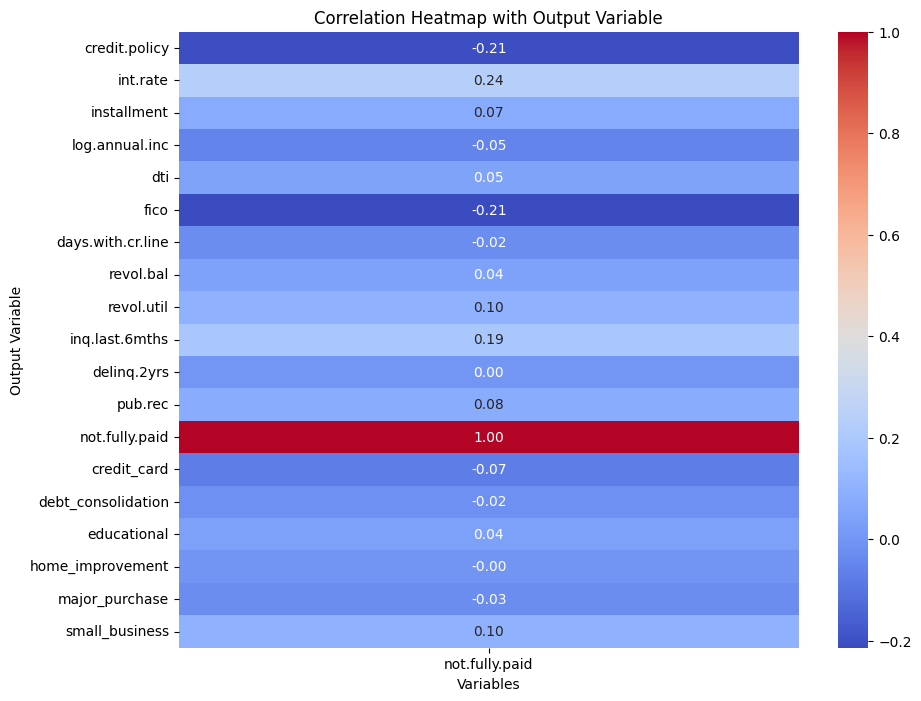

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'output_variable' is your output variable, and 'other_columns' is a list of other columns
# 'data' is your DataFrame containing all these variables

# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Extract the correlation values between 'output_variable' and other columns
corr_with_output = corr_matrix['not.fully.paid']

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_output.to_frame(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap with Output Variable')
plt.xlabel('Variables')
plt.ylabel('Output Variable')
plt.show()

not.fully.paid has less correlation with delinq.2yrs , revol.util , revol.bal , revol.baldays.with.cr.line , dti , log.annual.inc , installment

In [63]:
X=df_encoded.drop(columns=["credit.policy", "not.fully.paid","fico", "log.annual.inc","days.with.cr.line","delinq.2yrs","credit_card","debt_consolidation", "home_improvement","major_purchase"], axis=1)
y=df_encoded[["not.fully.paid"]]

In [64]:
X.head()

,purpose,int.rate,installment,dti,revol.bal,revol.util,inq.last.6mths,pub.rec,educational,small_business
1383,credit_card,0.1146,197.75,13.73,14154,85.8,0,0,0,0
6310,major_purchase,0.1461,310.28,15.44,3971,58.4,0,0,0,0
2603,debt_consolidation,0.1442,412.60,7.91,8748,85.8,1,0,0,0
2423,all_other,0.1663,638.46,10.91,6241,21.0,3,0,0,0
6017,debt_consolidation,0.1114,367.40,10.80,10631,36.9,3,0,0,0


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=42 ,test_size=0.25, shuffle=True)

In [28]:
X_train.shape

(2299, 18)

In [29]:
y_test.shape

(767, 1)

In [30]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [66]:
import tensorflow as tf

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [78]:
model=Sequential()
model.add(Dense(256,activation="relu",input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1,activation="sigmoid"))



In [84]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               4864      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [80]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [87]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
72/72 [==============================] - 1s 15ms/step - loss: 0.1948 - accuracy: 0.9226 - val_loss: 1.7791 - val_accuracy: 0.5398
Epoch 2/100
72/72 [==============================] - 1s 9ms/step - loss: 0.1784 - accuracy: 0.9287 - val_loss: 1.7603 - val_accuracy: 0.5359
Epoch 3/100
72/72 [==============================] - 1s 8ms/step - loss: 0.1953 - accuracy: 0.9169 - val_loss: 1.7563 - val_accuracy: 0.5515
Epoch 4/100
72/72 [==============================] - 1s 8ms/step - loss: 0.1808 - accuracy: 0.9274 - val_loss: 1.7788 - val_accuracy: 0.5450
Epoch 5/100
72/72 [==============================] - 0s 6ms/step - loss: 0.2208 - accuracy: 0.9113 - val_loss: 1.6646 - val_accuracy: 0.5489
Epoch 6/100
72/72 [==============================] - 1s 7ms/step - loss: 0.1939 - accuracy: 0.9156 - val_loss: 1.6840 - val_accuracy: 0.5437
Epoch 7/100
72/72 [==============================] - 1s 11ms/step - loss: 0.2011 - accuracy: 0.9252 - val_loss: 1.7115 - val_accuracy: 0.5424
Epoch 8/100

In [88]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

24/24 [==============================] - 0s 2ms/step - loss: 1.9033 - accuracy: 0.5463
Test Accuracy: 0.5463
